In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mplt
import pylab as plt
from pylab import *
import scipy
from scipy.fftpack import fft,fftfreq, fftshift

In [67]:
df = pd.read_csv("/home/sofiagm/CompuDatos/Eval1/Eval2/nassa.csv",names=['Año','Mes','Comb','Manchas','5','6','s'])

In [71]:
df.head()

,Año,Mes,Comb,Manchas,5,6
0,1749,1,1749.042,96.7,-1.0,-1
1,1749,2,1749.123,104.3,-1.0,-1
2,1749,3,1749.204,116.7,-1.0,-1
3,1749,4,1749.288,92.8,-1.0,-1
4,1749,5,1749.371,141.7,-1.0,-1


In [69]:
df.columns

Index(['Año', 'Mes', 'Comb', 'Manchas', '5', '6', 's'], dtype='object')

In [70]:
del df['s']

In [72]:
df.describe()

,Año,Mes,Comb,Manchas,5,6
count,3213.000000,3213.000000,3213.000000,3213.000000,3213.000000,3213.000000
mean,1882.375350,6.495798,1882.873012,82.923561,5.610955,89.781201
std,77.304865,3.451370,77.304802,67.819418,5.234367,185.247160
min,1749.000000,1.000000,1749.042000,0.000000,-1.000000,-1.000000
25%,1815.000000,3.000000,1815.958000,25.300000,-1.000000,-1.000000
50%,1882.000000,6.000000,1882.874000,69.700000,5.400000,30.000000
75%,1949.000000,9.000000,1949.790000,123.300000,9.400000,31.000000
max,2016.000000,12.000000,2016.708000,398.200000,23.500000,977.000000


In [73]:
df.apply(lambda x: sum(x.isnull()), axis=0)

Año        0
Mes        0
Comb       0
Manchas    0
5          0
6          0
dtype: int64

In [75]:
df.tail()

,Año,Mes,Comb,Manchas,5,6
3208,2016,5,2016.373,52.1,4.7,810
3209,2016,6,2016.456,20.9,2.2,886
3210,2016,7,2016.540,32.5,3.7,910
3211,2016,8,2016.624,50.7,4.4,879
3212,2016,9,2016.708,44.7,3.8,742


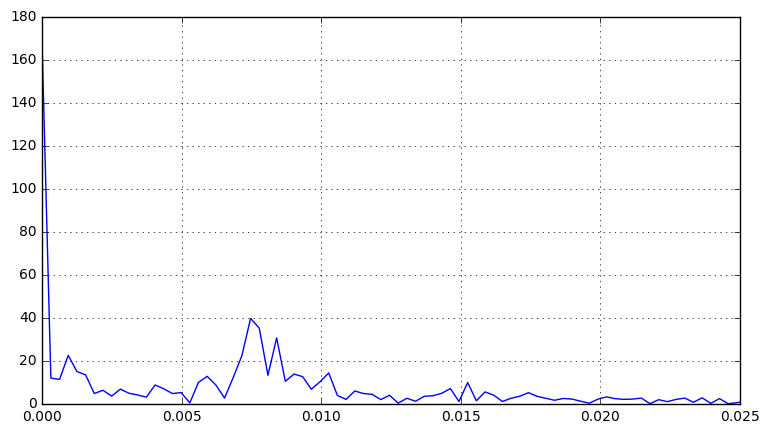

In [113]:
N = 3213
T = 1.0
#aplicacion de la transformada de Fourier
x = df['Comb']
y = df['Manchas'] 
yf = fft(y)
xf = fftfreq(N, T)
xf = fftshift(xf)
yplot = fftshift(yf)

graf = plt.plot(xf, 2.0/N *abs(yplot))
plt.xlim(0,0.025)
plt.grid(True)

fig = plt.gcf()
fig.set_size_inches(9, 5)
plt.show()

In [114]:
a=2*np.absolute(yf)/N

In [124]:
print(np.where(a[:,] > 15))
b=a[a[:,] > 15]
b

(array([   0,    3,    4,   23,   24,   25,   27, 3186, 3188, 3189, 3190,
       3209, 3210]),)


array([ 165.84712107,   22.79918361,   15.28281214,   22.67815211,
         39.98723321,   35.419832  ,   30.90803788,   30.90803788,
         35.419832  ,   39.98723321,   22.67815211,   15.28281214,
         22.79918361])

In [134]:
#AMPLITUD
A1 = 2.0*np.absolute(yf[int(23),]/N)
A2 = 2.0*np.absolute(yf[int(24),]/N)
A3 = 2.0*np.absolute(yf[int(25),]/N)

#FRECUENCIA
f_A1 = xf[int(N/2+23),]
f_A2 = xf[int(N/2+24),]
f_A3 = xf[int(N/2+25),]

#PERIODO
T1 = 1/f_A1
T2 = 1/f_A2
T3 = 1/f_A3

In [145]:
print('Modo 1')
print('Número de manchas=',A1)
print('Frecuencia=',f_A1)
print('Periodo=',T1)

print('Modo 2')
print('Número de manchas=',A2)
print('Frecuencia=',f_A2)
print('Periodo=',T2)

print('Modo 3')
print('Número de manchas=',A3)
print('Frecuencia=',f_A3)
print('Periodo=',T3)

Modo 1
Número de manchas= 22.6781521056
Frecuencia= 0.00715841892312
Periodo= 139.695652174
Modo 2
Número de manchas= 39.9872332086
Frecuencia= 0.00746965452848
Periodo= 133.875
Modo 3
Número de manchas= 35.4198320032
Frecuencia= 0.00778089013383
Periodo= 128.52


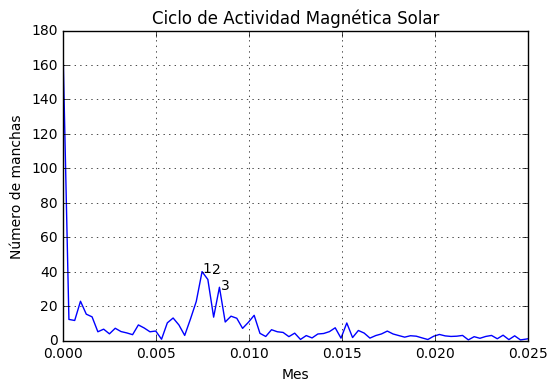

In [163]:
N = 3213
T = 1.0
#aplicacion de la transformada de Fourier
x = df['Comb']
y = df['Manchas'] 
yf = fft(y)
xf = fftfreq(N, T)
xf = fftshift(xf)
yplot = fftshift(yf)

graf = plt.plot(xf, 2.0/N *abs(yplot))
plt.xlim(0,0.025)
plt.grid(True)

plt.title('Ciclo de Actividad Magnética Solar')
plt.xlabel('Mes')
plt.ylabel('Número de manchas')

plt.text(0.00746965452848, 39.9872332086, '1')
plt.text(0.008, 39, '2')
plt.text(0.0085,30,'3')

plt.show()